# Data Exploration: Binary Classification of Insurance Cross Selling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load the dataset
insurance_train_path = 'data/train.csv'
insurance_train_df = pd.read_csv(insurance_train_path,index_col=None)
insurance_train_df.columns= insurance_train_df.columns.str.lower()
insurance_train_df.columns = insurance_train_df.columns.str.replace(' ','_')

# Map 'Yes' to 1 and 'No' to 0
insurance_train_df['vehicle_damage'] = insurance_train_df['vehicle_damage'].map({'Yes': 1, 'No': 0})


In [61]:
insurance_train_df

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,Male,21,1,35.00,0,1-2 Year,1,"65,101.00",124.00,187,0
1,1,Male,43,1,28.00,0,> 2 Years,1,"58,911.00",26.00,288,1
2,2,Female,25,1,14.00,1,< 1 Year,0,"38,043.00",152.00,254,0
3,3,Female,35,1,1.00,0,1-2 Year,1,"2,630.00",156.00,76,0
4,4,Female,36,1,15.00,1,1-2 Year,0,"31,951.00",152.00,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.00,0,1-2 Year,1,"27,412.00",26.00,218,0
11504794,11504794,Female,26,1,36.00,0,< 1 Year,1,"29,509.00",152.00,115,1
11504795,11504795,Female,29,1,32.00,1,< 1 Year,0,"2,630.00",152.00,189,0
11504796,11504796,Female,51,1,28.00,0,1-2 Year,1,"48,443.00",26.00,274,1


### Statistics for the dimensions

In [4]:
categorical_statistics = insurance_train_df.astype('object').describe()
categorical_statistics

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
count,11504798,11504798,11504798,11504798,11504798.0,11504798,11504798,11504798,11504798.0,11504798.0,11504798,11504798
unique,11504798,2,66,2,54.0,2,3,2,51728.0,152.0,290,2
top,11504797,Male,24,1,28.0,0,1-2 Year,Yes,2630.0,152.0,187,0
freq,1,6228134,815884,11482041,3451062.0,6178116,5982678,5783229,2112561.0,4166183.0,98018,10089739


### Statistics for the metrics

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
numerical_columns = ["age","response","annual_premium"]
insurance_train_df[numerical_columns].describe()

,age,response,annual_premium
count,"11,504,798.00","11,504,798.00","11,504,798.00"
mean,38.38,0.12,"30,461.37"
std,14.99,0.33,"16,454.75"
min,20.00,0.00,"2,630.00"
25%,24.00,0.00,"25,277.00"
50%,36.00,0.00,"31,824.00"
75%,49.00,0.00,"39,451.00"
max,85.00,1.00,"540,165.00"


## Graphs

### Sampling
The dataset contains 11 million rows, making it challenging to process and visualize the graphs. To handle this, a sample of 10% of the data is used for the graphs.

In [6]:
sample_percentage = 0.1
my_seed_value = 42
np.random.seed(my_seed_value)

# Create a random permutation of indices
random_indices = np.random.permutation(insurance_train_df.index)

# Shuffle the DataFrame using the random indices
random_df = insurance_train_df.iloc[random_indices]

random_df = random_df.reset_index(drop=True)  # drop=True removes the old index column
sample_size = round(len(random_df)*sample_percentage)
sample_df = random_df.iloc[:sample_size]

sample_df

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,2899125,Female,41,1,28.00,0,1-2 Year,Yes,"29,590.00",157.00,46,0
1,3854901,Female,40,1,28.00,0,1-2 Year,Yes,"42,910.00",13.00,245,0
2,7377384,Male,31,1,18.00,0,< 1 Year,Yes,"30,375.00",152.00,31,0
3,10901782,Female,24,1,37.00,1,< 1 Year,No,"2,630.00",152.00,217,0
4,8099641,Male,33,1,28.00,1,1-2 Year,No,"45,224.00",124.00,286,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1150475,5824553,Female,66,1,28.00,0,1-2 Year,Yes,"55,741.00",26.00,34,0
1150476,4646382,Male,23,1,41.00,1,< 1 Year,No,"2,630.00",151.00,100,0
1150477,10613086,Female,23,1,18.00,1,< 1 Year,No,"27,877.00",152.00,199,0
1150478,8023348,Female,29,1,35.00,1,< 1 Year,No,"38,100.00",152.00,128,0


(array([394108., 126512., 114998., 149800., 145889.,  81664.,  68029.,
         42036.,  24707.,   2737.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

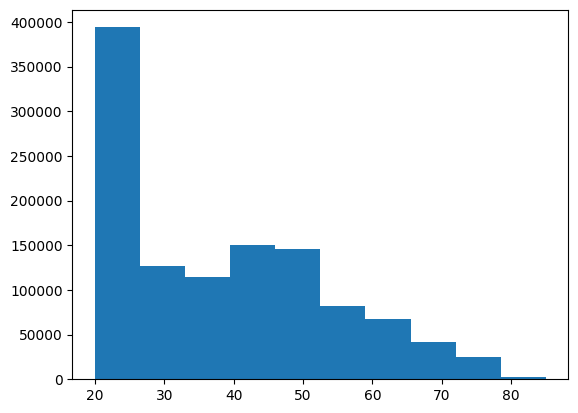

In [7]:
plt.hist(sample_df["age"],label='Histogram')

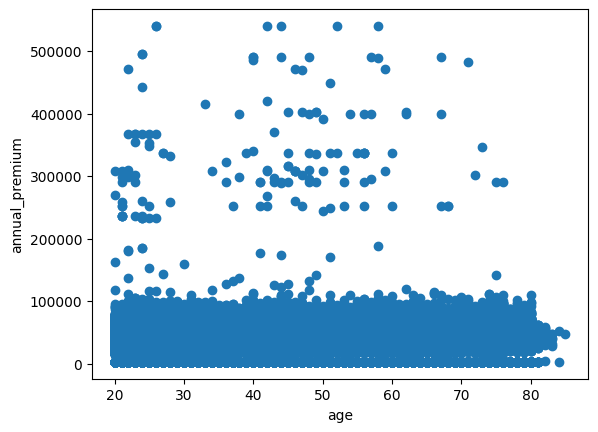

In [8]:
colors = {1: 'green', 0: 'blue'}
plt.scatter(sample_df["age"],sample_df["annual_premium"])
plt.xlabel('age')
plt.ylabel('annual_premium')
plt.show()

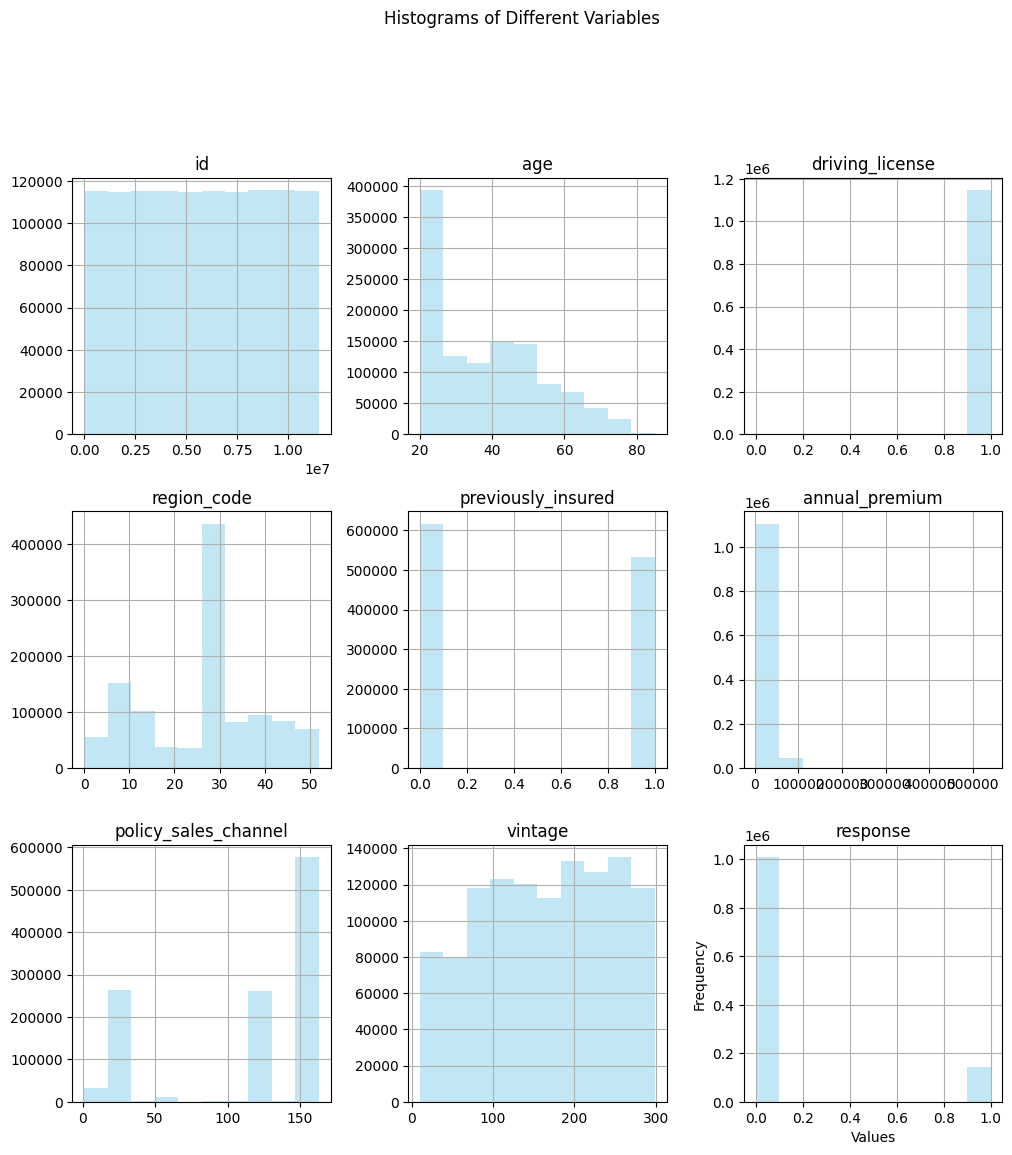

In [9]:
# Plot histograms for each variable
sample_df.hist(bins=10, alpha=0.5, figsize=(12, 12), color='skyblue')

# Add labels and title
plt.suptitle('Histograms of Different Variables', y=1.02)
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

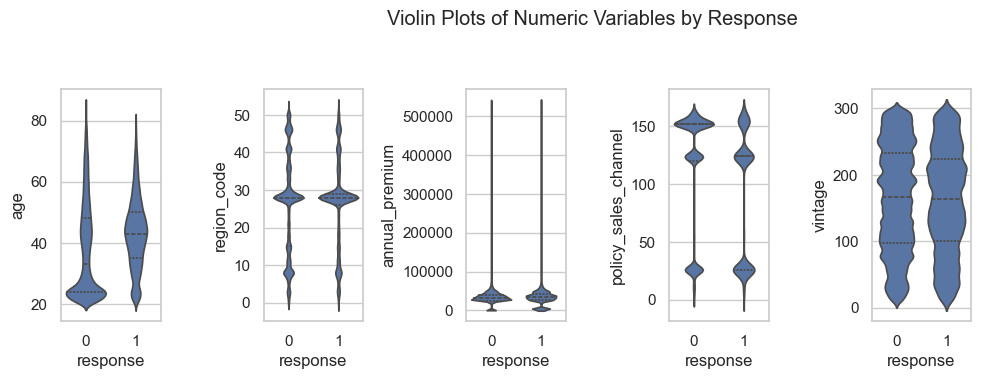

In [29]:
# Set the style to whitegrid for better aesthetics (optional)
sns.set(style="whitegrid")
column_names = sample_df.columns
violin_plots_columns = ['age', 'region_code', 'annual_premium','policy_sales_channel','vintage']
# Create violin plots for each variable, categorized by "smoking"
plt.figure(figsize=(12, 12))
for i, variable in enumerate(violin_plots_columns):
    plt.subplot(4, 6, i + 1)
    sns.violinplot(x='response', y=variable, data=sample_df, inner='quartile')

# Add labels and title
plt.suptitle('Violin Plots of Numeric Variables by Response', y=1.02)
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x26a04dd50f0>,
 [Text(1, 0, 'Response = 1'), Text(2, 0, 'Response = 0')])

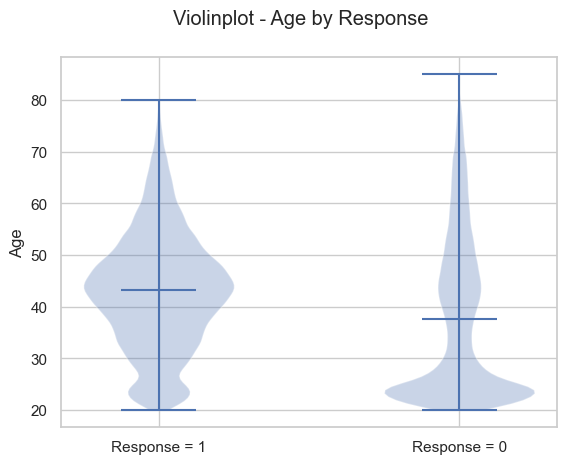

In [22]:
plt.violinplot([sample_df['age'][sample_df['response'] == 1], sample_df['age'][sample_df['response'] == 0]], showmeans=True)
# Add labels and title
plt.suptitle('Violinplot - Age by Response')
plt.ylabel('Age')
plt.xticks([1, 2], ['Response = 1', 'Response = 0'])

The density distribution between respones display a different behaviour. It seems that Responses = 1 tend to be older, having a big concentration between 40 and 50 years old. On the other hand, responses = 0 tend to be younger, and there is a big concentration betewwn 30 and 20

([<matplotlib.axis.XTick at 0x26a2466b400>,
 [Text(1, 0, 'Response = 1'), Text(2, 0, 'Response = 0')])

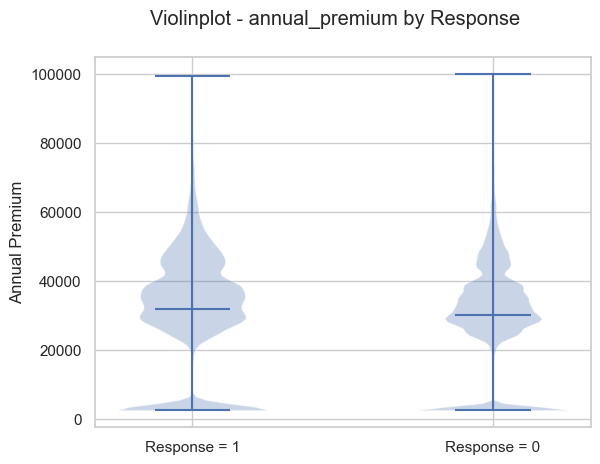

In [30]:
# Filtering out rows with an Annual premium above 100,000
filtered_sample_df = sample_df[sample_df['annual_premium']< 100000]
plt.violinplot([filtered_sample_df['annual_premium'][filtered_sample_df['response'] == 1], filtered_sample_df['annual_premium'][filtered_sample_df['response'] == 0]], showmeans=True)
# Add labels and title
plt.suptitle('Violinplot - annual_premium by Response')
plt.ylabel('Annual Premium')
plt.xticks([1, 2], ['Response = 1', 'Response = 0'])

Analyzing the distribution, the response =1 have a slighlt bigger concentration on higher Annual Premiums

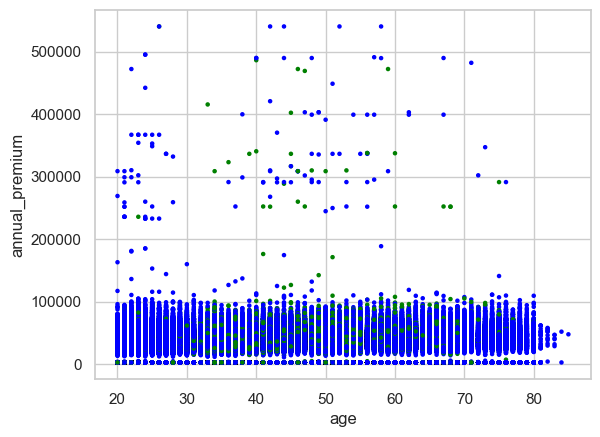

In [26]:
colors = {1: 'green', 0: 'blue'}
plt.scatter(sample_df["age"],sample_df["annual_premium"],c=sample_df["response"].map(colors),s=5)
plt.xlabel('age')
plt.ylabel('annual_premium')
plt.show()

In [27]:
correlation = sample_df['age'].corr(sample_df['annual_premium'])
print(correlation)


0.055746217852187974


There is no clear correlation between "Age" and "Annual Premium"

### Pie plots distribution of dimensions by response

#### Drivers license - response distribution

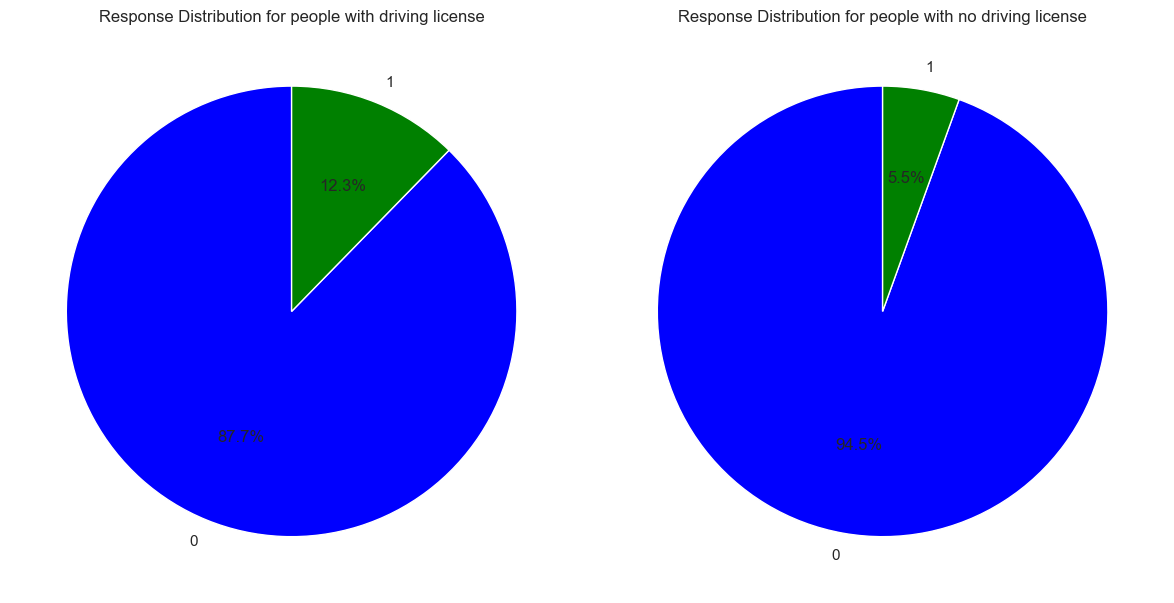

In [51]:
# Filter data for people with driving license
driving_license_count = insurance_train_df[insurance_train_df['driving_license'] == 1]['response'].value_counts()

# Filter data for people with no driving license
not_driving_license_count = insurance_train_df[insurance_train_df['driving_license'] == 0]['response'].value_counts()

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for people with driving license
axes[0].pie(driving_license_count, labels=driving_license_count.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[0].set_title('Response Distribution for people with driving license')

# Plot the pie chart for people with no driving license
axes[1].pie(not_driving_license_count, labels=not_driving_license_count.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[1].set_title('Response Distribution for people with no driving license')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Registers with driving license have a higher proportion of responses (12.3) than registers with no driving license (5.5%)

#### Previously Insured - response distribution

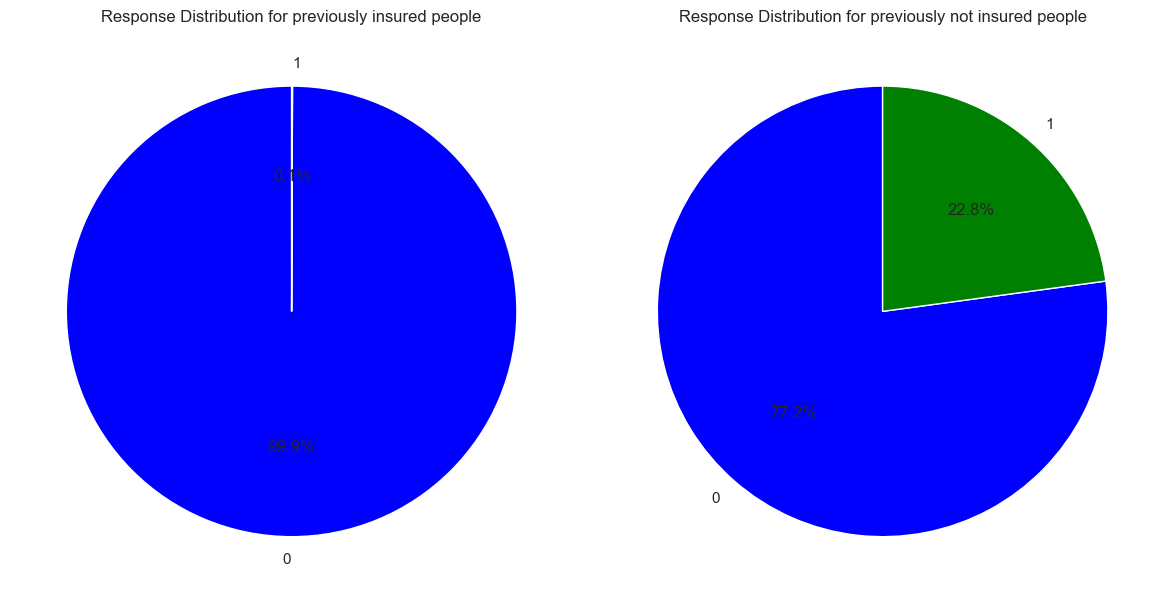

In [37]:
# Filter data for people with previous insurance
previously_insured_count = insurance_train_df[insurance_train_df['previously_insured'] == 1]['response'].value_counts()

# Filter data for people with no previous insurance
previously_not_insured_count = insurance_train_df[insurance_train_df['previously_insured'] == 0]['response'].value_counts()

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for people with previous insurance
axes[0].pie(previously_insured_count, labels=previously_insured_count.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[0].set_title('Response Distribution for previously insured people')

# Plot the pie chart for people with no previous insurance
axes[1].pie(previously_not_insured_count, labels=previously_not_insured_count.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[1].set_title('Response Distribution for previously not insured people')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Previously insured registers do not tend to have a positive response (only 0.1% of the cases registered a positive response). 
###### Around the 23% of previously not insured register have a positive response.

In [41]:
insurance_train_df[insurance_train_df['previously_insured'] == 1]['response'].value_counts()

response
0    5323282
1       3400
Name: count, dtype: int64

In [40]:
insurance_train_df[insurance_train_df['previously_insured'] == 0]['response'].value_counts()

response
0    4766457
1    1411659
Name: count, dtype: int64

#### Vehicle age - response distribution

In [53]:
insurance_train_df.vehicle_age.value_counts()

vehicle_age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64

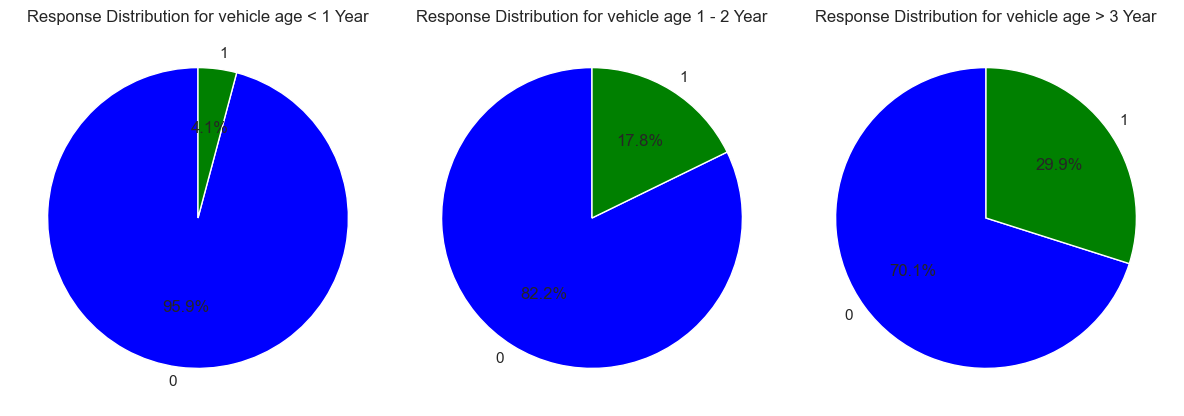

In [56]:
# Filter data for people with previous insurance
count_1 = insurance_train_df[insurance_train_df['vehicle_age'] == '< 1 Year']['response'].value_counts()
count_2 = insurance_train_df[insurance_train_df['vehicle_age'] == '1-2 Year']['response'].value_counts()
count_3 = insurance_train_df[insurance_train_df['vehicle_age'] == '> 2 Years']['response'].value_counts()

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot the pie chart for people with previous insurance
axes[0].pie(count_1, labels=count_1.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[0].set_title('Response Distribution for vehicle age < 1 Year')

# Plot the pie chart for people with no previous insurance
axes[1].pie(count_2, labels=count_2.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[1].set_title('Response Distribution for vehicle age 1 - 2 Year')

# Plot the pie chart for people with no previous insurance
axes[2].pie(count_3, labels=count_3.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[2].set_title('Response Distribution for vehicle age > 3 Year')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Registers with an older vehicle have a higher proportion of responses. 

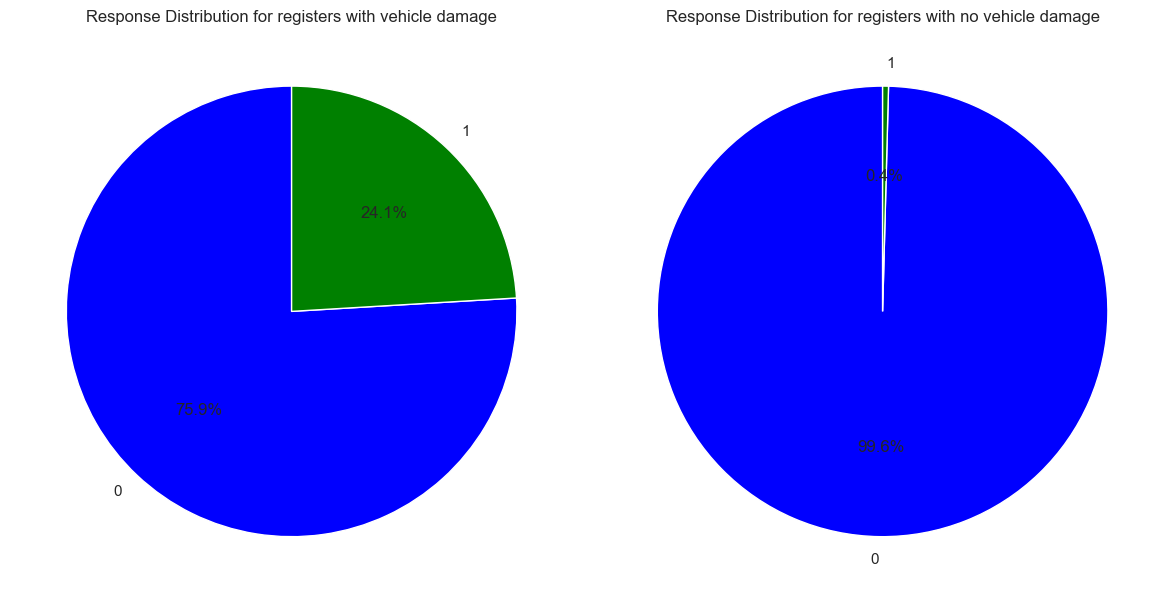

In [62]:
# Filter data for people with previous insurance
vehicle_damage_count = insurance_train_df[insurance_train_df['vehicle_damage'] == 1]['response'].value_counts()

# Filter data for people with no previous insurance
not_vehicle_damage_count = insurance_train_df[insurance_train_df['vehicle_damage'] == 0]['response'].value_counts()

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for people with previous insurance
axes[0].pie(vehicle_damage_count, labels=vehicle_damage_count.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[0].set_title('Response Distribution for registers with vehicle damage')

# Plot the pie chart for people with no previous insurance
axes[1].pie(not_vehicle_damage_count, labels=not_vehicle_damage_count.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
axes[1].set_title('Response Distribution for registers with no vehicle damage')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###### Around the 24.1% of registers with vehicle damage have a positive response
###### Registers with no vehicle damage do not tend to have a positive response (only 0.4% of the cases registered a positive response). 


## Insights

- Registers with a positive response tend to be older
- Registers with a positive response tend to have a higher annual premium
- Registers with driving license have a higher proportion of responses than registers with no driving license (12.3% vs 5.5%)
- Registers previously insured have a lower proportion of responses than registers previously not insured (0.1% vs 22.8%)
- Registers with an older vehicle have a higher proportion of responses.
- Registers with vehicle damage have a higher proportion of responses than registers with no vehicle damage (24.1% vs 0.4%)
  
 